# Perform Clustering

<p class="lead"><i>This Jupyter notebook performs clustering for 6 pollutants NO2, CO, SO2, Ozone, PM2.5 and PM10 </i></p>


In [28]:
import pandas as pd
import numpy as np
from pandas import *
import os,scipy, datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

def performClustering(filename, pollutant_name):
    filepath = os.getcwd() + filename
    df= pd.read_csv(filepath)
    shuffled_df = shuffle(df)
    def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                if feature!='AQI':
                    df[feature] = le.fit_transform(df[feature])
                else:
                    print('Hello')
                    df[feature] = df[feature]
            except:
                print('Error encoding '+feature)
        return df
    df_new = shuffled_df.copy()
    X_enc=dummyEncode(df_new)
    print(datetime.datetime.now()," Defining begins... ")
    K = range(1,15)
    KM = [kmeans(np.array(X_enc),k) for k in K]
    centroids = [cent for (cent,var) in KM]   
    avgWithinSS = [var for (cent,var) in KM]
    print(datetime.datetime.now()," Defigning done... ")
    print(datetime.datetime.now()," Plotting bend graph... ")
    kIdx = 3
    ### Optimal number of clusters
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    ax.plot(K[kIdx], avgWithinSS[kIdx], marker='*', markersize=10, 
        markeredgewidth=2, markeredgecolor='b', markerfacecolor='None')
    plt.grid(True)
    plt.xlabel('Number of clusters K')
    plt.ylabel('Total within-clusters sum of squares')
    plt.title('Optimal number of clusters')
    plt.show()
    print(datetime.datetime.now()," Done plotting!!  ")
    print(datetime.datetime.now()," Clustering begins... ")
    k_means=cluster.KMeans(n_clusters=8).fit(X_enc)
    print(datetime.datetime.now()," Done!!... ")
    df1=pd.DataFrame(shuffled_df)
    df2=pd.DataFrame(k_means.labels_,columns=['kmean.label'])
    df_clustered=pd.concat([df1, df2], axis=1)
    print("--------K-means Clustering--------")
    print("Grouping into clusters...")
    grouped = df_clustered.groupby(['kmean.label'])
    l_grouped = list(grouped)
    print("Exporting clusters as individual dataframes...")
    count = 0
    h_cluster =[]
    for hierarchy_group in l_grouped:
        df_clustered = l_grouped[count][1]
        h_cluster.append(df_clustered)
        print("Cluster ",count," of " ,len(df_clustered), " rows!")
        csv_name = pollutant_name + "_K-means_Cluster_"+str(count)+".csv"
        df_clustered.to_csv(csv_name, index= False, encoding='cp1252')
        count+=1
    #df['Group'].value_counts()
    print("--------Manual Clustering--------")
    print("Grouping into clusters...")
    grade_grouped = df.groupby(['Group'])
    g_grouped = list(grade_grouped)
    print("Exporting clusters as individual dataframes...")
    count = 0
    g_cluster =[]
    for manual_group in g_grouped:
        df_g_clustered = g_grouped[count][1]
        g_cluster.append(df_g_clustered)
        print(pollutant_name + " Manual Cluster ",count," of " ,len(df_g_clustered), " rows!")
        csv_name = pollutant_name + "_Manual_Group_Cluster_"+str(count)+".csv"
        df_g_clustered.to_csv(csv_name, index= False, encoding='cp1252')
        count+=1

2017-08-18 01:38:19.296765  Defining begins... 
2017-08-18 01:49:53.581124  Defigning done... 
2017-08-18 01:49:53.685194  Plotting bend graph... 


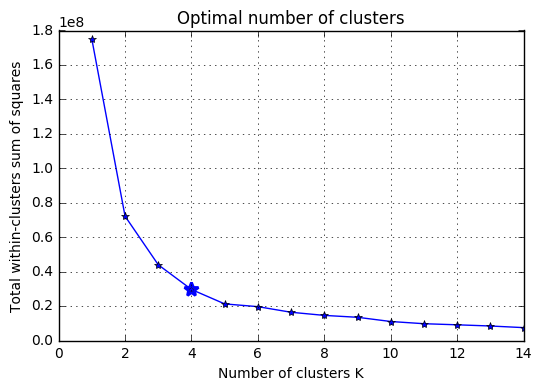

2017-08-18 01:49:54.703870  Done plotting!!  
2017-08-18 01:49:54.703870  Clustering begins... 
2017-08-18 01:50:16.770156  Done!!... 
--------K-means Clustering--------
Grouping into clusters...
Exporting clusters as individual dataframes...
Cluster  0  of  107456  rows!
Cluster  1  of  298732  rows!
Cluster  2  of  134691  rows!
Cluster  3  of  70282  rows!
Cluster  4  of  134313  rows!
Cluster  5  of  10077  rows!
Cluster  6  of  62243  rows!
Cluster  7  of  48373  rows!
--------Manual Clustering--------
Grouping into clusters...
Exporting clusters as individual dataframes...
PM10 Manual Cluster  0  of  828015  rows!
PM10 Manual Cluster  1  of  34965  rows!
PM10 Manual Cluster  2  of  2342  rows!
PM10 Manual Cluster  3  of  537  rows!
PM10 Manual Cluster  4  of  143  rows!
PM10 Manual Cluster  5  of  165  rows!


In [29]:
#function call
performClustering("/Summarized_daily_PM10.csv", "PM10")